# load set of acoustic files, test library

In [1]:
import pandas as pd
#from acoustics import Signal
import matplotlib.pyplot as plt

# cognac data and tools
import cognac.insitu as insi
from cognac.insitu.arecorder import play

In [2]:
root_dir = '/Users/aponte/Current_projects/cognac/campagnes_techno/2019_lopstech/source_qualif/'
sequence, fs = insi.source.load_emission_sequence(root_dir+'sequence_cos_A1/')

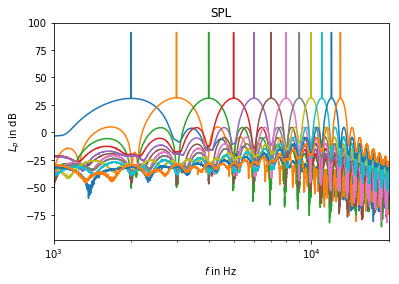

In [3]:
#sequence[0].plot_power_spectrum()
ax = plt.subplot(111)
for i, s in enumerate(sequence):
    s.plot_power_spectrum(xlim=[1e3,2e4], ax=ax, label=str(i))
    plt.close() # should not be necessary ...
#plt.legend()

In [4]:
print('sampling frequencies in Hz:', *list(fs))

sampling frequencies in Hz: 76125


In [5]:
data_dir = root_dir+'data/loggerhead/'
arec = insi.arecorder.acoustic_recorder(data_dir, 'logger_head')

In [6]:
arec.df.head()

,file_name,file_path,ID,gain,Voltage,Version
time,,,,,,
2019-03-27 13:40:20,20190327T134020.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,8.07,4.13,2019-03-26
2019-03-27 13:41:00,20190327T134100.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,8.07,4.09,2019-03-26
2019-04-11 09:37:50,20190411T093750.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,-3.86,4.03,2019-03-26
2019-04-11 09:38:50,20190411T093850.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,-3.86,4.05,2019-03-26
2019-04-11 09:39:50,20190411T093950.wav,/Users/aponte/Current_projects/cognac/campagne...,42332290775159,-3.86,4.03,2019-03-26


In [42]:
t0 = arec.df.index[10]-pd.Timedelta(10,'second')
t1 = t0+pd.Timedelta(10,'minute')
#t1 = t0+pd.Timedelta(15,'second')
print(t0,t1)

2019-04-11 09:45:39 2019-04-11 09:55:39


In [43]:
s, t = arec[t0:t1]

In [44]:
s.fs

44100

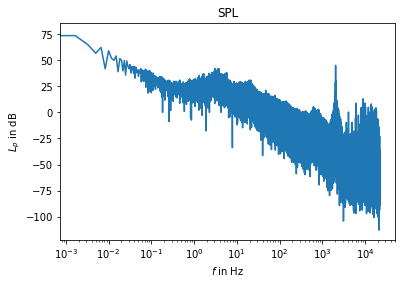

In [45]:
fig = s.plot_power_spectrum()

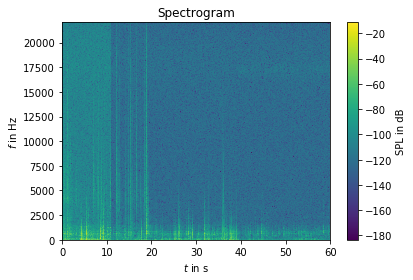

In [17]:
fig = s.plot_spectrogram()

In [ ]:
#s.amplitude_envelope().plot()

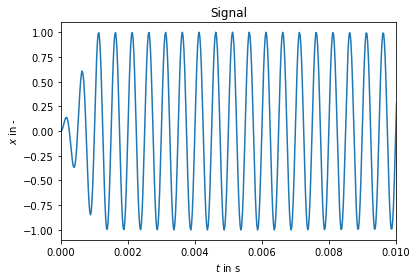

In [46]:
s_rs = sequence[0].resample(s.fs)
s_rs.plot(xlim=[0,.01])

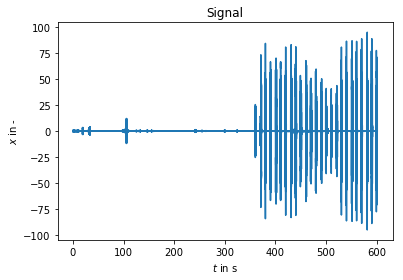

In [48]:
s.correlate(s_rs).plot()